In [39]:
import pandas as pd
import math
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv("Iris.csv")

In [41]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [42]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [44]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [45]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [46]:
df.drop('Id', axis=1, inplace=True)

In [47]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [48]:
df.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [49]:
df.groupby('SepalLengthCm').size()

SepalLengthCm
4.3     1
4.4     3
4.5     1
4.6     4
4.7     2
4.8     5
4.9     6
5.0    10
5.1     9
5.2     4
5.3     1
5.4     6
5.5     7
5.6     6
5.7     8
5.8     7
5.9     3
6.0     6
6.1     6
6.2     4
6.3     9
6.4     7
6.5     5
6.6     2
6.7     8
6.8     3
6.9     4
7.0     1
7.1     1
7.2     3
7.3     1
7.4     1
7.6     1
7.7     4
7.9     1
dtype: int64

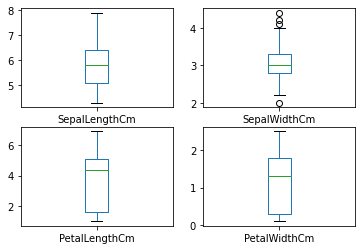

In [50]:
df.plot(kind='box', subplots=True, layout=(2,2))
plt.show()

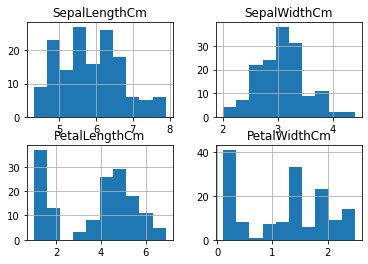

In [51]:
df.hist()
plt.show()

In [52]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [54]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)
score = classifier.score(X_test, y_test)
print(CM)
print(score)


[[ 9  0  0]
 [ 0 13  0]
 [ 0  0  8]]
1.0


In [55]:
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)
score = classifier.score(X_test, y_test)
print(CM)
print(score)

[[ 9  0  0]
 [ 0 13  0]
 [ 0  0  8]]
1.0


In [56]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(random_state = 1234)
DTC.fit(X_train, y_train)
YP = DTC.predict(X_test)
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)
score = DTC.score(X_test, y_test)
print(CM)
print(score)

[[ 9  0  0]
 [ 0 13  0]
 [ 0  0  8]]
1.0


In [57]:
import pickle
file = open('IRIS_RFC.pkl', 'wb')

pickle.dump(DTC , file)